## Observations and Insights 

There was an almost perfect 50/50 split of male and female mice, and thankfully there was only one duplicated mouse, which was ID g989. The data associated with this mouse was removed from the data set, to avoid any skewing of the rest of the data set. Out of the top four drug regimens, the two most successful drug regimens for average tumor growth were Capomulin and Ramicane, however Capomulin was given a much more robust statistical analysis. The drug regimen with the highest outlier was Infubinol; the other three drug regimens had no potentially skewing outliers. A randomly chosen mouse given the Capomulin regimen (ID r554) had the largest drop in tumor volume between about the 5th day and 15th day of the treatment. There appears to be a positive correlation between average tumor volume and mouse weight. 

In [252]:
# dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [253]:
# read the mouse data
mouse_df = pd.read_csv(mouse_metadata_path)
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [254]:
# read the study results
study_df = pd.read_csv(study_results_path)
study_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [255]:
# Combine the data into a single dataset
complete_df = pd.merge(mouse_df, study_df, on="Mouse ID", how="outer")
complete_df = complete_df.rename(columns={"Age_months": "Age (months)"})

# Display the data table for preview
complete_df

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [256]:
# exported merged csv (just for fun/to test my own skills)
complete_df.to_csv("data/merged.csv", index=False, header=True)

In [257]:
# Checking the number of mice
mice_count = len(complete_df["Mouse ID"].unique())
mice_count

249

In [258]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicates_df = complete_df[complete_df.duplicated(["Mouse ID", "Timepoint"])]
duplicates_df

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [259]:
# Get all data for duplicate mouse ID - optional
duplicate_mouse = complete_df.loc[complete_df.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

all_duplicates = complete_df[complete_df["Mouse ID"] == "g989"]
all_duplicates

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [260]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mice_df = complete_df[complete_df["Mouse ID"].isin(duplicate_mouse) == False]
clean_mice_df 

,Mouse ID,Drug Regimen,Sex,Age (months),Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [261]:
# Checking the number of mice in the clean DataFrame - should be one less mouse than initial df
mice_count = len(clean_mice_df["Mouse ID"].unique())
mice_count

248

In [262]:
# Now all the data is cleaned and ready to be analyzed

## Summary Statistics

In [263]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
# I rounded the data for a cleaner look

drug_regimens = clean_mice_df.groupby(["Drug Regimen"])

regimen_mean = drug_regimens["Tumor Volume (mm3)"].mean()
regimen_median = drug_regimens["Tumor Volume (mm3)"].median()
regimen_var = drug_regimens["Tumor Volume (mm3)"].var()
regimen_std = drug_regimens["Tumor Volume (mm3)"].std()
regimen_sem = drug_regimens["Tumor Volume (mm3)"].sem()

drug_regimen_df = pd.DataFrame({"Mean of Tumor Volume (mm3)": regimen_mean,
                                "Median of Tumor Volume (mm3)": regimen_median,
                                "Variance of Tumor Volume (mm3)": regimen_var,
                                "Standard Deviation of Tumor Volume (mm3)": regimen_std,
                                "SEM of Tumor Volume (mm3)": regimen_sem})

drug_regimen_df.round(3)

,Mean of Tumor Volume (mm3),Median of Tumor Volume (mm3),Variance of Tumor Volume (mm3),Standard Deviation of Tumor Volume (mm3),SEM of Tumor Volume (mm3)
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


In [264]:
# Using the aggregation method, produce the same summary statistics in a single line
drug_regimens_df = drug_regimens["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", "sem"])
drug_regimens_df.round(3)

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.676,41.558,24.948,4.995,0.329
Ceftamin,52.591,51.776,39.290,6.268,0.470
Infubinol,52.885,51.821,43.129,6.567,0.492
Ketapril,55.236,53.699,68.554,8.280,0.604
Naftisol,54.332,52.509,66.173,8.135,0.596
Placebo,54.034,52.289,61.168,7.821,0.581
Propriva,52.321,50.446,43.852,6.622,0.544
Ramicane,40.217,40.673,23.487,4.846,0.321
Stelasyn,54.233,52.432,59.451,7.710,0.573


## Bar and Pie Charts

In [265]:
# Value counts to visualize data before plotting

drug_measurements = clean_mice_df["Drug Regimen"].value_counts()
drug_measurements

Capomulin    230
Ramicane     228
Ketapril     188
Naftisol     186
Zoniferol    182
Stelasyn     181
Placebo      181
Infubinol    178
Ceftamin     178
Propriva     148
Name: Drug Regimen, dtype: int64

Text(0.5, 1.0, 'Total Number of Measurements per Drug Regimen')

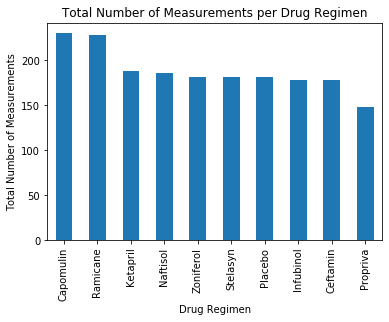

In [266]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas

ax = drug_measurements.plot.bar()

ax.set_xlabel("Drug Regimen")
ax.set_ylabel("Total Number of Measurements")
ax.set_title("Total Number of Measurements per Drug Regimen")

Text(0, 0.5, 'Total Number of Measurements')

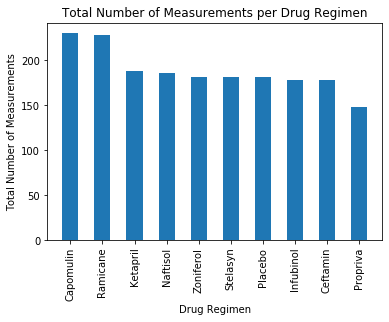

In [267]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.

x_axis = drug_measurements.index
y_axis = drug_measurements.values

plt.bar(x_axis, y_axis, width=0.5)
plt.xticks(rotation="vertical")
plt.title("Total Number of Measurements per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Number of Measurements")

In [268]:
# Value counts to visualize data before plotting

sex_group = clean_mice_df.groupby(["Mouse ID", "Sex"])
sex_df = pd.DataFrame(sex_group.size())

sex_count = pd.DataFrame(sex_df.groupby(["Sex"]).count())
sex_count.columns = ["Total Count"]

sex_count["Percentage of Sex (M/F)"] = (100*(sex_count["Total Count"] / sex_count["Total Count"].sum()))

sex_count["Percentage of Sex (M/F)"] = sex_count["Percentage of Sex (M/F)"]

sex_count.round(2)

,Total Count,Percentage of Sex (M/F)
Sex,,
Female,123,49.6
Male,125,50.4


Text(0.5, 1.0, 'Distribution of Female vs Male Mice')

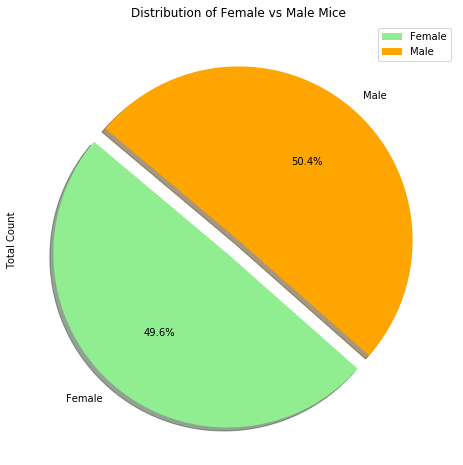

In [269]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
colors = ["lightgreen", "orange"]
explode = [0.1, 0]

sex_count.plot.pie(y = "Total Count", figsize=(13,8), explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Distribution of Female vs Male Mice")

Text(0.5, 1.0, 'Distribution of Female vs Male Mice')

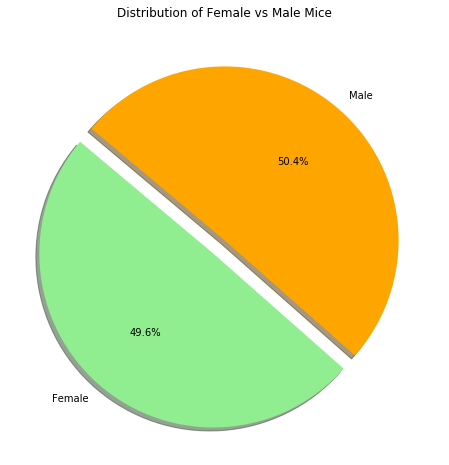

In [270]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels = ["Female", "Male"]
sizes = ["49.6", 50.4]
colors = ["lightgreen", "orange"]
explode = [0.1, 0]

fig = plt.figure(figsize=(13,8))
plt.pie(sizes, labels=labels, explode=explode, colors=colors, autopct="%1.1f%%", shadow=True, startangle=140)

plt.title("Distribution of Female vs Male Mice")

## Quartiles, Outliers and Boxplots

In [271]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse

In [272]:
# Capomulin
capomulin_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Capomulin",:]

capomulin_last = capomulin_df.groupby('Mouse ID').max()['Timepoint']
capomulin_vol = pd.DataFrame(capomulin_last)
capomulin_merge_df = pd.merge(capomulin_vol, clean_mice_df, on=("Mouse ID","Timepoint"),how="left")
capomulin_merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age (months),Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [273]:
ramicane_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Ramicane", :]

ramicane_last = ramicane_df.groupby('Mouse ID').max()['Timepoint']
ramicane_vol = pd.DataFrame(ramicane_last)
ramicane_merge_df = pd.merge(ramicane_vol, clean_mice_df, on=("Mouse ID","Timepoint"),how="left")
ramicane_merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age (months),Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [274]:
infubinol_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Infubinol", :]

infubinol_last = infubinol_df.groupby('Mouse ID').max()['Timepoint']
infubinol_vol = pd.DataFrame(infubinol_last)
infubinol_merge_df = pd.merge(infubinol_vol, clean_mice_df, on=("Mouse ID","Timepoint"),how="left")
infubinol_merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age (months),Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [275]:
ceftamin_df = clean_mice_df.loc[clean_mice_df["Drug Regimen"] == "Ceftamin", :]

ceftamin_last = ceftamin_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_vol = pd.DataFrame(ceftamin_last)
ceftamin_merge_df = pd.merge(ceftamin_vol, clean_mice_df, on=("Mouse ID","Timepoint"),how="left")
ceftamin_merge_df.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age (months),Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [276]:
# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
frames = [capomulin_merge_df, ramicane_merge_df, infubinol_merge_df, ceftamin_merge_df]
tumor_volume_df = pd.concat(frames)
tumor_volume_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age (months),Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2
...,...,...,...,...,...,...,...,...
20,x226,0,Ceftamin,Male,23,28,45.000000,0
21,x581,45,Ceftamin,Female,19,28,64.634949,3
22,x822,45,Ceftamin,Male,3,29,61.386660,3
23,y769,45,Ceftamin,Female,6,27,68.594745,4


In [277]:
# Put treatments into a list for for loop (and later for plot labels)
drug_regimen_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in drug_regimen_list:
    tumor_volume_by_drug = tumor_volume_df["Tumor Volume (mm3)"].loc[tumor_volume_df["Drug Regimen"] == drug]
    
    # add subset 
    tumor_volumes.append(tumor_volume_by_drug)
  
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volume_by_drug.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = (upperq - lowerq).round(2)
    
    print(f"For {drug}, IQR is {iqr}")
    lower_bound = (lowerq - (1.5*iqr)).round(2)
    upper_bound = (upperq + (1.5*iqr)).round(2)
    print(f"For {drug}, values below {lower_bound} could be outliers")
    print(f"For {drug}, values above {upper_bound} could be outliers\n")

For Capomulin, IQR is 7.78
For Capomulin, values below 20.71 could be outliers
For Capomulin, values above 51.83 could be outliers

For Ramicane, IQR is 9.1
For Ramicane, values below 17.91 could be outliers
For Ramicane, values above 54.31 could be outliers

For Infubinol, IQR is 11.48
For Infubinol, values below 36.83 could be outliers
For Infubinol, values above 82.75 could be outliers

For Ceftamin, IQR is 15.58
For Ceftamin, values below 25.35 could be outliers
For Ceftamin, values above 87.67 could be outliers



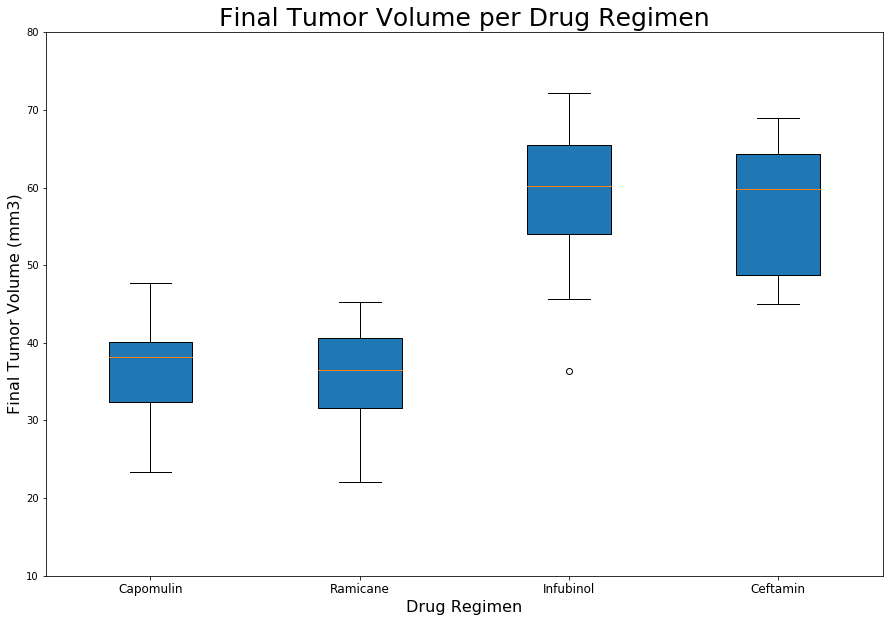

In [278]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots(figsize=(15, 10))
ax1.set_title("Final Tumor Volume per Drug Regimen", fontsize=25)
ax1.set_ylabel("Final Tumor Volume (mm3)", fontsize=16)
ax1.set_xlabel("Drug Regimen", fontsize=16)
ax1.set_xticklabels(drug_regimen_list, fontsize=12)
ax1.boxplot(tumor_volumes, widths = 0.4, patch_artist=True, vert=True)
plt.ylim(10, 80)

plt.show()

## Line and Scatter Plots

Text(0.5, 0, 'Timepoint')

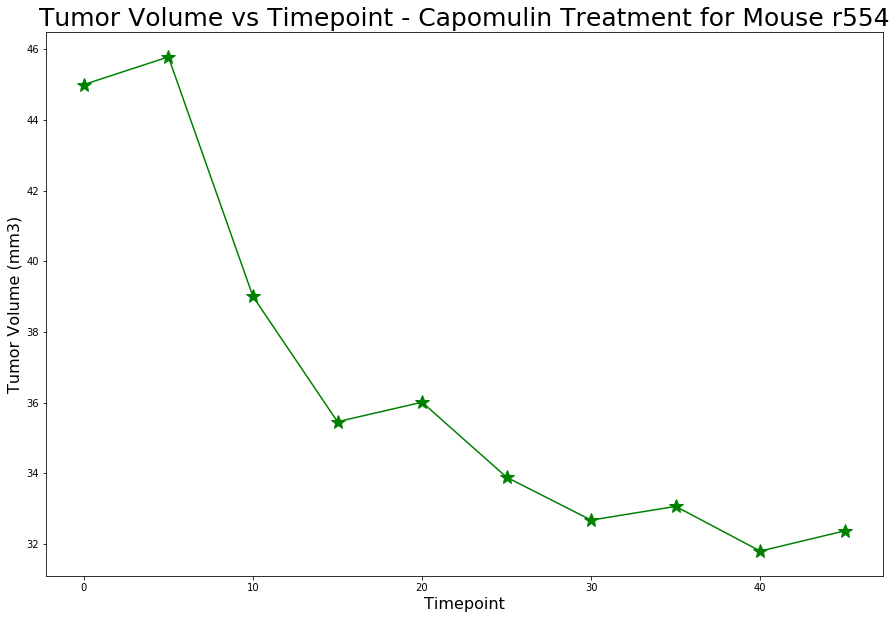

In [279]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
    # pick mouse at random - I chose r554
individual_mouse = clean_mice_df[["Timepoint", "Tumor Volume (mm3)"]].loc[(clean_mice_df["Drug Regimen"] == "Capomulin") & (clean_mice_df["Mouse ID"] == "r554")]

    # make line plot
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.plot(individual_mouse["Timepoint"], individual_mouse["Tumor Volume (mm3)"], color="green", marker = "*", markersize=15)
plt.title("Tumor Volume vs Timepoint - Capomulin Treatment for Mouse r554", fontsize=25)
plt.ylabel("Tumor Volume (mm3)", fontsize=16)
plt.xlabel("Timepoint", fontsize=16)

Text(0.5, 0, 'Mouse Weight (g)')

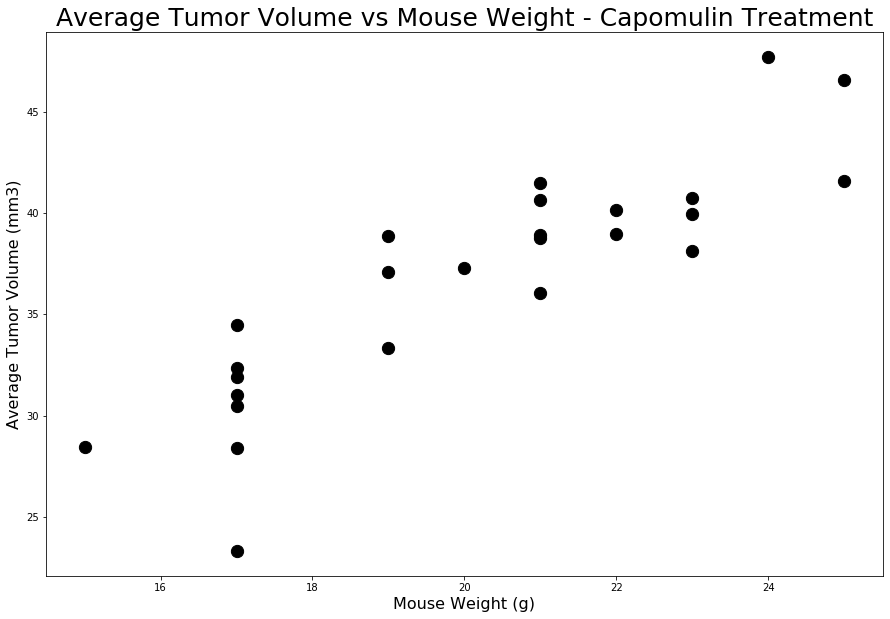

In [280]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
average_capomulin = capomulin_merge_df.groupby(['Mouse ID']).mean()

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(average_capomulin["Weight (g)"], average_capomulin["Tumor Volume (mm3)"], color="black", s=150)
plt.title("Average Tumor Volume vs Mouse Weight - Capomulin Treatment", fontsize=25)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=16)
plt.xlabel("Mouse Weight (g)", fontsize=16)

## Correlation and Regression

In [281]:
# Calculate the correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen
corr_coe = round(st.pearsonr(average_capomulin["Weight (g)"], average_capomulin["Tumor Volume (mm3)"])[0],2)
print(f"The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is {corr_coe}")

The correlation coefficient for mouse weight and average tumor volume for the Capomulin regimen is 0.88


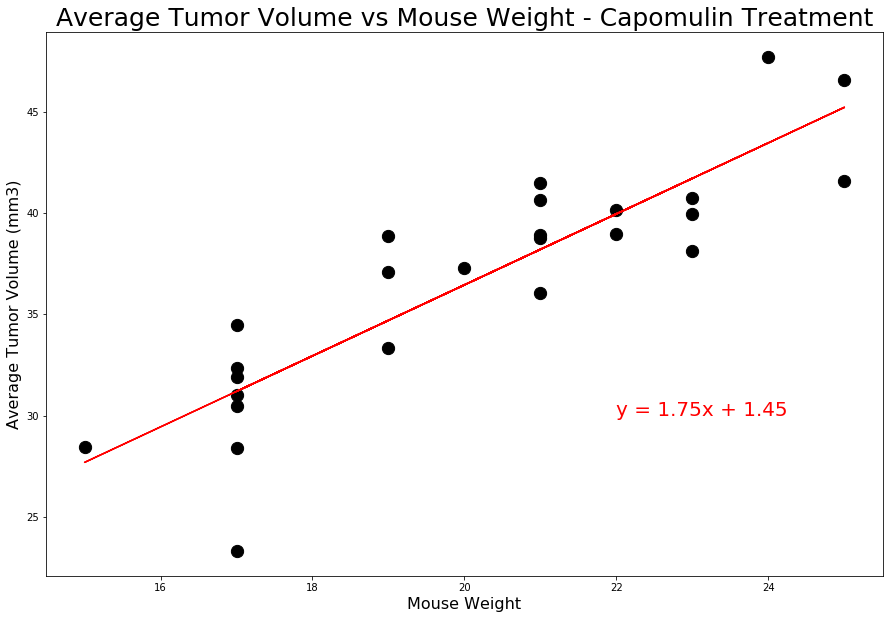

In [282]:
# Calculate and plot the linear regression for mouse weight and average tumor volume for the Capomulin regimen
fig1, ax1 = plt.subplots(figsize=(15, 10))

x_values = average_capomulin["Weight (g)"]
y_values = average_capomulin["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, color="black", s=150)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(22, 30),fontsize=20,color="red")
plt.title("Average Tumor Volume vs Mouse Weight - Capomulin Treatment", fontsize=25)
plt.xlabel("Mouse Weight", fontsize=16)
plt.ylabel("Average Tumor Volume (mm3)", fontsize=16)
plt.show()

In [283]:
print(f"The r-squared is: {rvalue**2}")
print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr_coe}")
print(f"stderr:{stderr}")
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

The r-squared is: 0.7686134812139006
slope:1.750468228958504
intercept:1.4481469525549002
rvalue (Correlation coefficient):0.8767060403658119
pandas (Correlation coefficient):0.88
stderr:0.20026513236453639
y = 1.75x + 1.45
